# PCA

### Import bibliotek

In [1491]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline

# Zadanie 1

### Odczyt danych z bazy iris

In [1492]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Standaryzacja danych względem cechy

In [1493]:
y = df['target']
df = (df.loc[:, df.columns != 'target'] - df.loc[:, df.columns != 'target'].mean())/df.loc[:, df.columns != 'target'].std()
df = pd.concat([df, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.897674,1.015602,-1.335752,-1.311052,0.0
1,-1.139200,-0.131539,-1.335752,-1.311052,0.0
2,-1.380727,0.327318,-1.392399,-1.311052,0.0
3,-1.501490,0.097889,-1.279104,-1.311052,0.0
4,-1.018437,1.245030,-1.335752,-1.311052,0.0


### Obliczenie macierzy kowariancji

In [1494]:
x_cov = np.cov(df.loc[:, df.columns != 'target'].T)
print('Macierz kowariancji:')
x_cov

Macierz kowariancji:


array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

### Obliczenie wartości i wektorów własnych

In [1495]:
w,v = np.linalg.eig(x_cov)
print(f'Wartości własne:\n{w}\n')
print(f'Wektory własne:\n{v}')

Wartości własne:
[2.91849782 0.91403047 0.14675688 0.02071484]

Wektory własne:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### Przzekształcenie w loadings

In [1496]:
loadings = v*np.sqrt(w)
loadings

array([[ 0.89016876, -0.36082989, -0.27565767,  0.03760602],
       [-0.46014271, -0.88271627,  0.09361987, -0.01777631],
       [ 0.99155518, -0.02341519,  0.05444699, -0.11534978],
       [ 0.96497896, -0.06399985,  0.24298265,  0.0753595 ]])

In [1497]:
df_plot = pd.DataFrame(loadings, columns=['load1', 'load2','load3','load4'])
df_plot.head()

,load1,load2,load3,load4
0,0.890169,-0.360830,-0.275658,0.037606
1,-0.460143,-0.882716,0.093620,-0.017776
2,0.991555,-0.023415,0.054447,-0.115350
3,0.964979,-0.064000,0.242983,0.075360


### Przeprowadzenie PCA dla przekształconych danych

In [1498]:
pca = PCA()
df_new = pd.DataFrame(pca.fit_transform(df.loc[:, df.columns != 'target']), columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_new.head()

,PC1,PC2,PC3,PC4
0,-2.257141,0.478424,-0.127280,-0.024088
1,-2.074013,-0.671883,-0.233826,-0.102663
2,-2.356335,-0.340766,0.044054,-0.028282
3,-2.291707,-0.595400,0.090985,0.065735
4,-2.381863,0.644676,0.015686,0.035803


### Wykresy po przekształceniu i redukcji wymiarowości 

Wybrano pierwsze trzy cechy, gdyż mają największe wartości własne. Czwarta cecha ma odpowiadającą, najmniejszą wartość własną.

In [1499]:
species = ['setosa','versicolor','virginica']
colors = ['r','g','b']
markers = ['o','x','*']
df_new = pd.concat([df_new, y], axis=1)

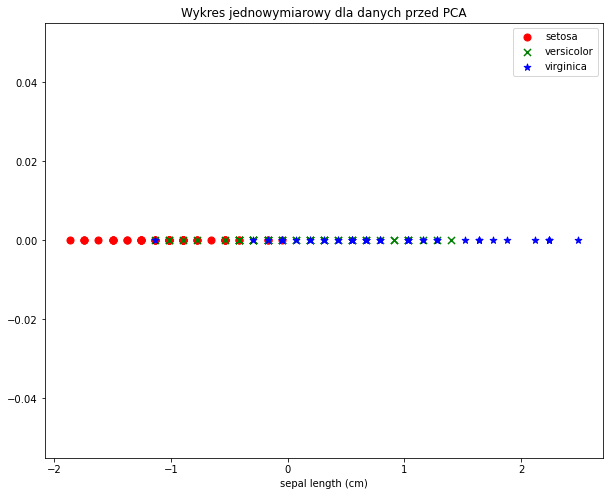

In [1500]:
plt.figure(figsize=(10,8))
for num in pd.unique(df['target']):
    new = df[df['target']==num]
    plt.scatter(new['sepal length (cm)'], np.zeros(new.shape[0]), c=colors[int(num)], marker=markers[int(num)], s=50)
plt.legend(['setosa','versicolor','virginica'])
plt.title('Wykres jednowymiarowy dla danych przed PCA')
plt.xlabel('sepal length (cm)')
plt.ylabel('')
plt.show()


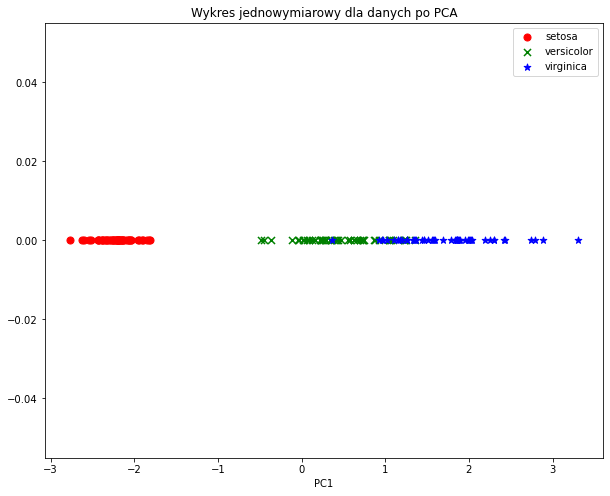

In [1501]:
plt.figure(figsize=(10,8))
for num in pd.unique(df_new['target']):
    new = df_new[df_new['target']==num]
    plt.scatter(new['PC1'], np.zeros(new.shape[0]), c=colors[int(num)], marker=markers[int(num)], s=50)
plt.legend(['setosa','versicolor','virginica'])
plt.title('Wykres jednowymiarowy dla danych po PCA')
plt.xlabel('PC1')
plt.ylabel('')
plt.show()


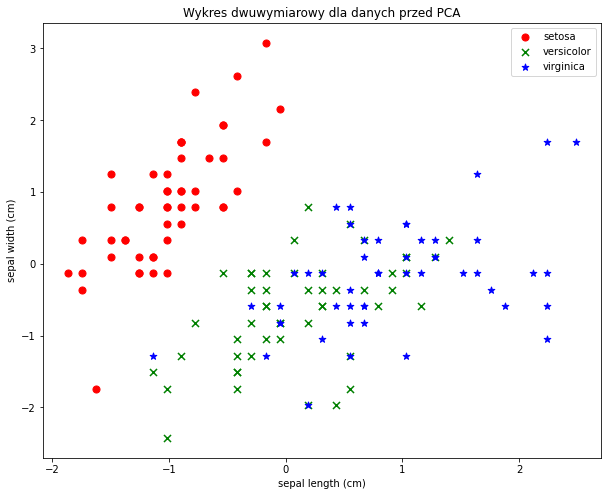

In [1502]:
plt.figure(figsize=(10,8))
for num in pd.unique(df['target']):
    new = df[df['target']==num]
    plt.scatter(new['sepal length (cm)'], new['sepal width (cm)'], c=colors[int(num)], marker=markers[int(num)], s=50)
plt.legend(['setosa','versicolor','virginica'])
plt.title('Wykres dwuwymiarowy dla danych przed PCA')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


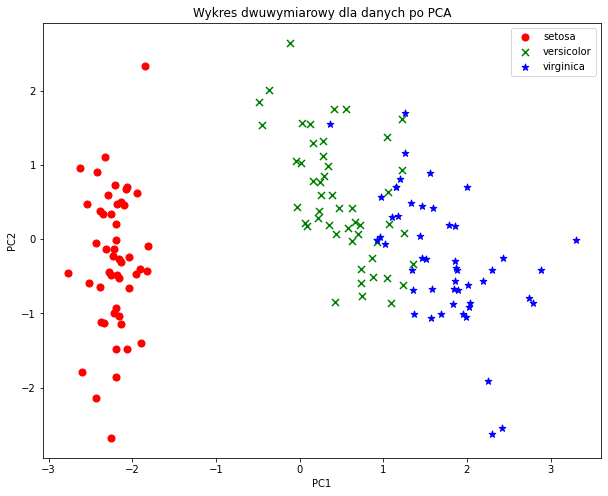

In [1503]:
plt.figure(figsize=(10,8))
for num in pd.unique(df_new['target']):
    new = df_new[df_new['target']==num]
    plt.scatter(new['PC1'], -new['PC2'], c=colors[int(num)], marker=markers[int(num)], s=50)
plt.legend(['setosa','versicolor','virginica'])
plt.title('Wykres dwuwymiarowy dla danych po PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


C:\Users\Julia\AppData\Local\Temp/ipykernel_22212/2483417677.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Julia\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


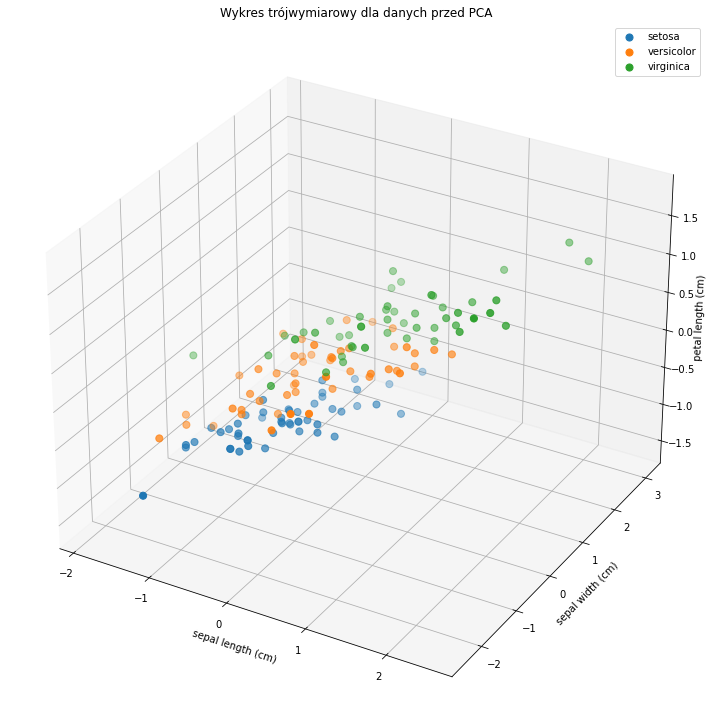

In [1504]:
colors = ['tab:blue','tab:orange','tab:green']
fig = plt.figure(figsize=(10,10),constrained_layout=True)
ax = fig.add_subplot(projection='3d')
for num in pd.unique(df['target']):
    new = df[df['target']==num]
    ax.scatter(new['sepal length (cm)'],new['sepal width (cm)'], new['petal length (cm)'], c=colors[int(num)], s=50)
ax.legend(['setosa','versicolor','virginica'])
ax.set_title('Wykres trójwymiarowy dla danych przed PCA')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
ax.zaxis.labelpad=-0.7
fig.show()



C:\Users\Julia\AppData\Local\Temp/ipykernel_22212/610583365.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


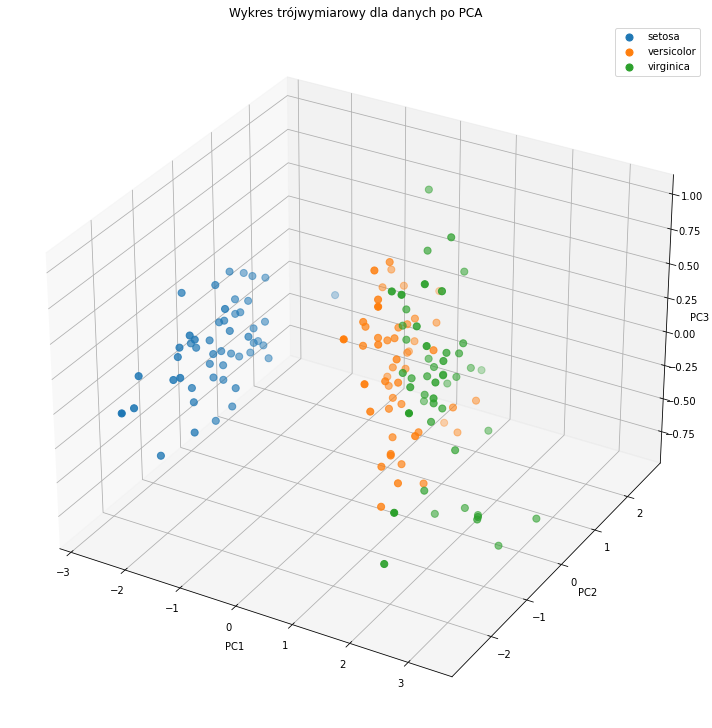

In [1505]:
fig2 = plt.figure(figsize=(10,10),constrained_layout=True)
ax2 = fig2.add_subplot(projection='3d')
for num in pd.unique(df_new['target']):
    new = df_new[df_new['target']==num]
    ax2.scatter(new['PC1'], -new['PC2'], new['PC3'], c=colors[int(num)], s=50)
ax2.legend(['setosa','versicolor','virginica'])
ax2.set_title('Wykres trójwymiarowy dla danych po PCA')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.zaxis.labelpad=-0.7
fig2.show()

# Zadanie 2

### Odczyt danych

In [1506]:
df = pd.read_csv('USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Wyświetlenie informacji o danych

In [1507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


### Obliczenie średniej dla każdej kolumny

In [1508]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

### Obliczenie wariancji dla każdej kolumny

In [1509]:
# Bardzo rozrzucone wyniki - potrzebne skalowanie
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

### Standaryzacja zmiennych tak, aby mieć średnią 0 i odchylenie standardowe 1 przed PCA

In [1510]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

### Wyliczenie loading wektorów przy pomocy PCA

In [1511]:
from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


### Dopasowanie modelu PCA i wyprowadzenie principal components

In [1512]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


### Biplot - wykres dla dwóch proncipal components, wyprowadzonych wcześniej

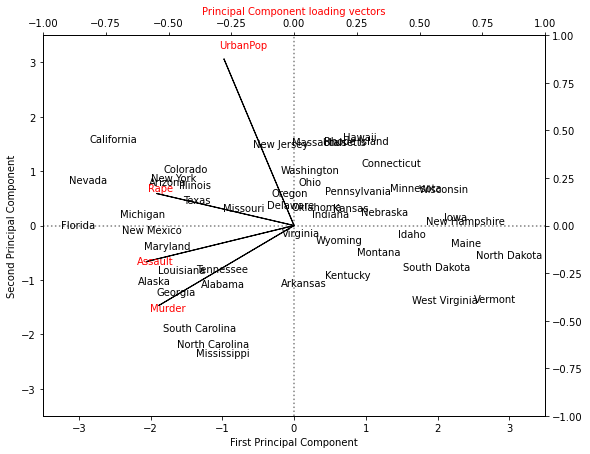

In [1513]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
                 
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and ta = 1.07
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

### Wypis wariancji dla principal components (PC)

In [1514]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

### Wypis proporcji wariancji dla principal components (PC)

In [1515]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

### Wykresy przedstawiające zmiany "wyjaśniania" wariancji przez PC

([<matplotlib.axis.XTick at 0x22827df3a30>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

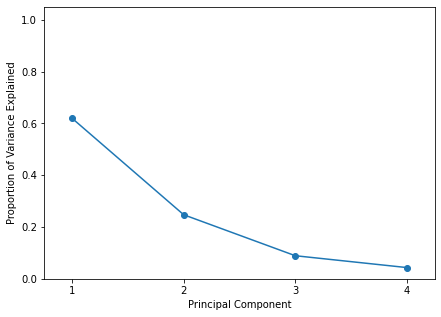

In [1516]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x22827e64190>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

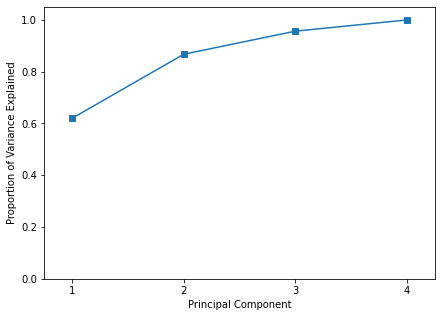

In [1517]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

### NCI60 Data Example

### Odczyt danych

In [1518]:
df2 = pd.read_csv('NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [1519]:
# Read in the labels to check our work later
y = pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])

### PCA on the NCI60 Data

### Skalowanie i dopasowanie PCA

In [1520]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

### WYrysowanie wykresu zależności poszczególnych PC

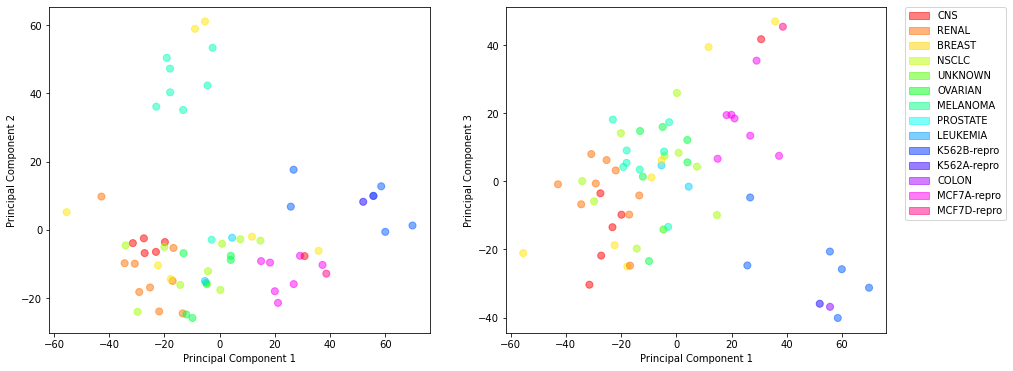

In [1521]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv
# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')
# Custom legend for the classes (y) since we do not create scatter plots per class (which could

handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
    ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

### Wypis danych dla poszczególnych PC

In [1522]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
pca2.explained_variance_ratio_[:5],
np.cumsum(pca2.explained_variance_ratio_[:5])],
index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


### Wariancje wyjaśniane przez pierwsze kilka PC 

Text(0, 0.5, 'Variances')

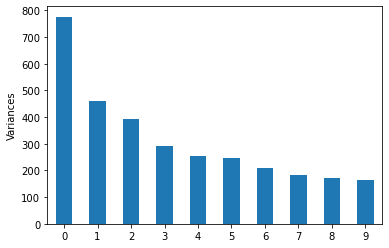

In [1523]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

### Wykresy przedstawiające zmiany "wyjaśniania" wariancji przez PC

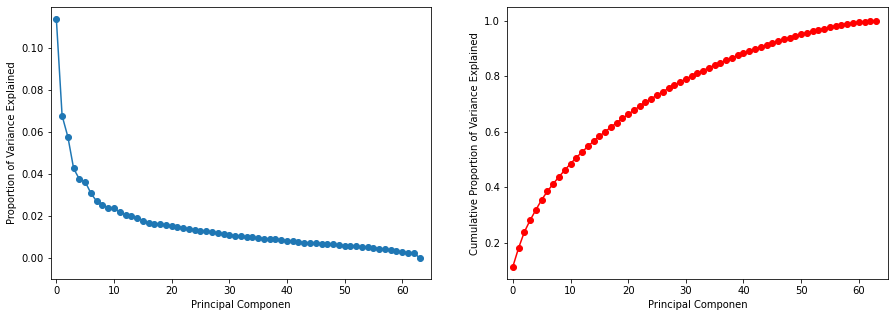

In [1524]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)
# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
    ax.set_xlabel('Principal Componen')
    ax.set_xlim(-1,65)